In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

#### Loading dataset

In [2]:
cars_dir = [car for car in glob.glob("../dataset/vehicles/*/*.png",recursive=True)]
non_car_dir = [non_car for non_car in glob.glob("../dataset/non-vehicles/*/*.png",recursive=True)]
print("Cars loaded: {} Non cars loaded: {}".format(len(cars_dir),len(non_car_dir)))

Cars loaded: 8792 Non cars loaded: 8968


#### Feature Extraction

In [52]:
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
#     print(features.shape)
    return features
# Seems like a useless step each channel for all images return same result
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    plt.hist(channel1_hist,bins=32,range=(0,256))
    plt.hist(channel2_hist,bins=32,range=(0,256))
    plt.hist(channel3_hist,bins=32,range=(0,256))
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
#     print(hist_features.shape)
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


array([4096,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4096,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 4096,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int64)

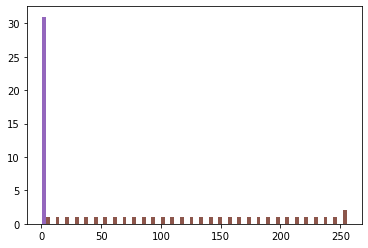

In [55]:
car_test = plt.imread(cars_dir[5])
new_img = cv2.cvtColor(car_test, cv2.COLOR_RGB2YCrCb)
color_hist(new_img)
